In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def dvdt(x):
    '''
    Function to calculate the acceleration
    
    Inputs:
    x : 2 element array for coordinates in x and y

    Output:
    acceleration
    '''
    
    grav_g = 39.47 # gravitational constant in AU*yr^2/Msun
    m_sun = 1 # in AU
    
    return -grav_g*m_sun*x[0]/(x[0]**2+x[1]**2)**(3/2)


def euler_orbit(x0,v0,t_final,delta_t):
    ''' 
    Function to calculate orbital trajectory with the Euler method
    
    Input:
    x0 : 2 element array for initial coordinates in x and y in AU
    v0 : 2 element array for initial velocity in x and y in AU/year
    t_final : final time of the simulation in years
    delta_t : time step in years
    
    Output:
    pos : array of coordinates at each timestep in AU
    vel : array of velocities at each timestep in AU/year
    '''
    
    # Make sure x0 and v0 are numpy arrays
    if isinstance(x0,list): x0=np.array(x0)
    if isinstance(v0,list): v0=np.array(v0)
    
    # How many timesteps
    n_time=int(np.ceil(t_final/delta_t))
    
    pos=[x0]
    vel=[v0]
    # Loop to integrate differential equation
    for ii in range(n_time):

        pos.append(pos[-1]+vel[-1]*delta_t)        
        vel.append(vel[-1]+np.array([dvdt(pos[-2]),dvdt(np.flip(pos[-2]))])*delta_t)

    return np.stack(pos),np.stack(vel)
    
    

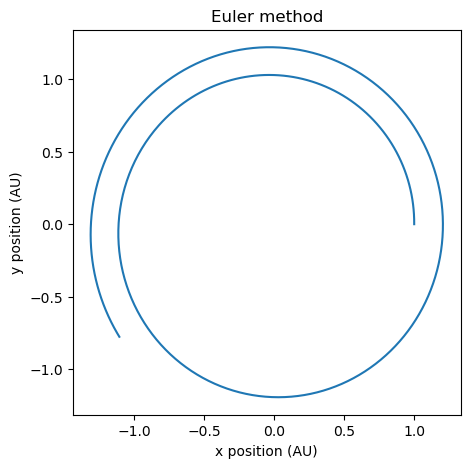

In [5]:
# Conditions for the simulation
x0=[1.0,0.0]
v0=[0.0,6.283185]
delta_t = 1.0/365.0
t_final = 2.0

# Integrate ODEs with Euler method
pos_euler,vel_euler=euler_orbit(x0,v0,t_final,delta_t)

# Plot the trajectory!
fig,ax=plt.subplots(figsize=(5,5))

ax.plot(pos_euler[:,0],pos_euler[:,1])

ax.set_ylabel('y position (AU)')
ax.set_xlabel('x position (AU)')
ax.set_title('Euler method')

plt.show()

In [6]:
def rk2_orbit(x0,v0,t_final,delta_t):
    ''' 
    Function to calculate orbital trajectory with the 2nd order Runge-Kutta method
    
    Input:
    x0 : 2 element array for initial coordinates in x and y in AU
    v0 : 2 element array for initial velocity in x and y in AU/year
    t_final : final time of the simulation in years
    delta_t : time step in years
    
    Output:
    pos : array of coordinates at each timestep in AU
    vel : array of velocities at each timestep in AU/year
    '''
    
    # Make sure x0 and v0 are numpy arrays
    if isinstance(x0,list): x0=np.array(x0)
    if isinstance(v0,list): v0=np.array(v0)
    
    # How many timesteps
    n_time=int(np.ceil(t_final/delta_t))
    
    pos=[x0]
    vel=[v0]
    # Loop to integrate differential equation
    for ii in range(n_time):
        
        # estimate change over time step
        k1_pos=vel[-1]*delta_t
        k1_vel=np.array([dvdt(pos[-1]),dvdt(np.flip(pos[-1]))])*delta_t
        
        # Get estimated position and velocity at midpoint
        x_mid=pos[-1]+0.5*k1_pos
        v_mid=vel[-1]+0.5*k1_vel
        
        # Get final estimate for position/velocity at endpoint
        k2_pos=v_mid*delta_t
        k2_vel=np.array([dvdt(x_mid),dvdt(np.flip(x_mid))])*delta_t

        pos.append(pos[-1]+k2_pos)        
        vel.append(vel[-1]+k2_vel)
        
    return np.stack(pos),np.stack(vel)

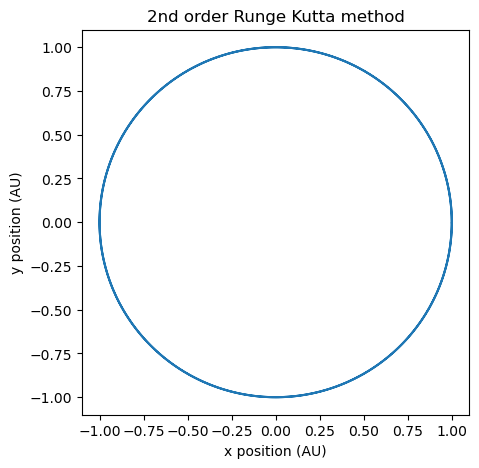

In [14]:
# Conditions for the simulation
x0=[1.0,0.0]
v0=[0.0,6.283185]
delta_t = 1.0/365.0
t_final = 2.0

# Integrate ODEs with RK2
pos_rk2,vel_rk2=rk2_orbit(x0,v0,t_final,delta_t)

# Plot the trajectory!
fig,ax=plt.subplots(figsize=(5,5))

ax.plot(pos_rk2[:,0],pos_rk2[:,1])

ax.set_ylabel('y position (AU)')
ax.set_xlabel('x position (AU)')
ax.set_title('2nd order Runge Kutta method')

plt.show()

In [8]:
def rk4_orbit(x0,v0,t_final,delta_t):
    ''' 
    Function to calculate orbital trajectory with the 2nd order Runge-Kutta method
    
    Input:
    x0 : 2 element array for initial coordinates in x and y in AU
    v0 : 2 element array for initial velocity in x and y in AU/year
    t_final : final time of the simulation in years
    delta_t : time step in years
    
    Output:
    pos : array of coordinates at each timestep in AU
    vel : array of velocities at each timestep in AU/year   
    '''
    
    # Make sure x0 and v0 are numpy arrays
    if isinstance(x0,list): x0=np.array(x0)
    if isinstance(v0,list): v0=np.array(v0)
    
    # How many timesteps
    n_time=int(np.ceil(t_final/delta_t))
    
    pos=[x0]
    vel=[v0]
    # Loop to integrate differential equation
    for ii in range(n_time):
        
        # k1
        k1_pos=vel[-1]*delta_t
        k1_vel=np.array([dvdt(pos[-1]),dvdt(np.flip(pos[-1]))])*delta_t
        
        # Get estimated position and velocity at midpoint from k1
        x_mid=pos[-1]+0.5*k1_pos
        v_mid=vel[-1]+0.5*k1_vel
        
        # k2
        k2_pos=v_mid*delta_t
        k2_vel=np.array([dvdt(x_mid),dvdt(np.flip(x_mid))])*delta_t
        
        # Get estimated position and velocity at midpoint from k2
        x_mid=pos[-1]+0.5*k2_pos
        v_mid=vel[-1]+0.5*k2_vel
        
        # k3
        k3_pos=v_mid*delta_t
        k3_vel=np.array([dvdt(x_mid),dvdt(np.flip(x_mid))])*delta_t
        
        # Get estimated position and velocity at endpoint from k2
        x_end=pos[-1]+k3_pos
        v_end=vel[-1]+k3_vel

        # k4
        k4_pos=v_end*delta_t
        k4_vel=np.array([dvdt(x_end),dvdt(np.flip(x_end))])*delta_t
        
        pos.append(pos[-1]+(1.0/6.0)*(k1_pos+2.0*k2_pos+2.0*k3_pos+k4_pos))        
        vel.append(vel[-1]+(1.0/6.0)*(k1_vel+2.0*k2_vel+2.0*k3_vel+k4_vel))
        
    return np.stack(pos),np.stack(vel)

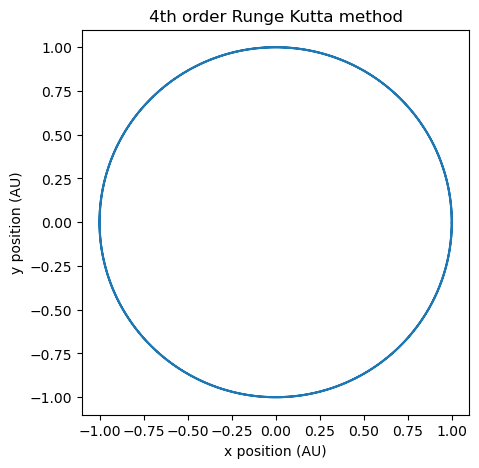

In [13]:
# Conditions for the simulation
x0=[1.0,0.0]
v0=[0.0,6.283185]
delta_t = 1.0/365.0
t_final = 2.0

# Integrate ODEs with RK4
pos_rk4,vel_rk4=rk4_orbit(x0,v0,t_final,delta_t)

# Plot the trajectory!
fig,ax=plt.subplots(figsize=(5,5))

ax.plot(pos_rk4[:,0],pos_rk4[:,1])

ax.set_ylabel('y position (AU)')
ax.set_xlabel('x position (AU)')
ax.set_title('4th order Runge Kutta method')

plt.show()

In [10]:
def adapt_rk4_orbit(x0,v0,t_final,des_error,delta_t0=1.0/36.50):
    ''' 
    Function to calculate orbital trajectory with the 2nd order Runge-Kutta method
    
    Input:
    x0 : 2 element array for initial coordinates in x and y in AU
    v0 : 2 element array for initial velocity in x and y in AU/year
    t_final : final time of the simulation in years
    des_error : desired error
    delta_t0 : initial timestep to start the adaptive algorithm
    
    Output:
    pos : array of coordinates at each timestep in AU
    vel : array of velocities at each timestep in AU/year   
    '''
        
    # Tolerance to get the error we want
    tol=des_error*1.0e-2
    
    pos=[x0]
    vel=[v0]
    delta_t=[delta_t0]
    time=[0.0]
    delta_t_prime=delta_t0
    while time[-1] < t_final:

        # Make sure we make it into the loop :)
        error = des_error + 2.0*tol
        while np.abs(error-des_error) > tol:
            
            # Use our rk4 function above to do two steps with delta_t0 and one step with 2*delta_t0
            pos_dt,vel_dt = rk4_orbit(pos[-1],vel[-1],2*delta_t_prime,delta_t_prime)
            pos_2dt,vel_2dt = rk4_orbit(pos[-1],vel[-1],2*delta_t_prime,2*delta_t_prime)
    
            # Use norms of positions to get the error and timestep
            error = (1.0/30.0)*(np.abs(np.linalg.norm(pos_dt[-1])-np.linalg.norm(pos_2dt[-1])))
            delta_t_prime = delta_t_prime*(des_error/error)**(1.0/5.0)
            
    
        pos.append(pos_dt[-1])
        vel.append(vel_dt[-1])
        delta_t.append(delta_t_prime)
        time.append(time[-1]+2*delta_t_prime)
    
    return np.stack(pos),np.stack(vel),np.array(delta_t),np.array(time)
    
    



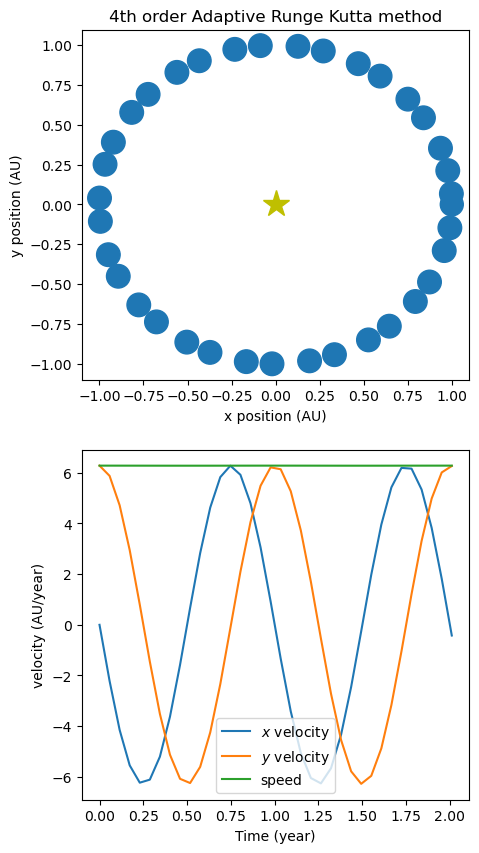

In [11]:
# Conditions for the simulation
x0=[1.0,0.0]
v0=[0.0,6.283185]
des_error = 1.0e-6
t_final = 2.0

# Run the adaptive rk4 method
pos_adapt,vel_adapt,delta_t_adapt,time_adapt=adapt_rk4_orbit(x0,v0,t_final,des_error)

# Plot the trajectory!
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(5,10))

ax1.scatter(pos_adapt[:,0],pos_adapt[:,1],s=10000*delta_t_adapt)
ax1.plot(0,0,'y*',markersize=20)

ax2.plot(time_adapt,vel_adapt[:,0], label='$x$ velocity')
ax2.plot(time_adapt,vel_adapt[:,1], label='$y$ velocity')
ax2.plot(time_adapt,np.sqrt(vel_adapt[:,0]**2+vel_adapt[:,1]**2), label='speed')

ax1.set_ylabel('y position (AU)')
ax1.set_xlabel('x position (AU)')
ax1.set_title('4th order Adaptive Runge Kutta method')

ax2.set_ylabel('velocity (AU/year)')
ax2.set_xlabel('Time (year)')
ax2.legend()

plt.savefig('adapt_rk4_circular.pdf',bbox_inches='tight')

plt.show()

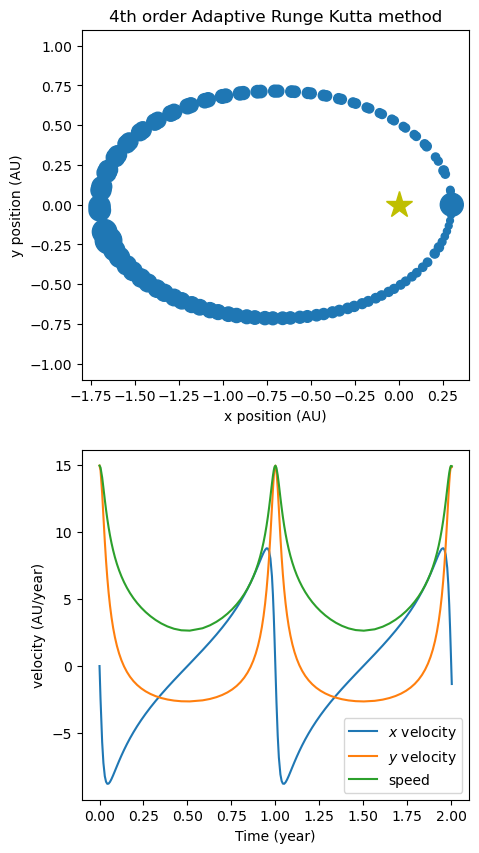

In [12]:
# Conditions for the simulation
x0=[0.3,0.0]
v0=[0.0,14.955378]
des_error = 1.0e-8
t_final = 2.0

# Run the adaptive rk4 method
pos_adapt,vel_adapt,delta_t_adapt,time_adapt=adapt_rk4_orbit(x0,v0,t_final,des_error)

# Plot the trajectory!
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(5,10))

ax1.scatter(pos_adapt[:,0],pos_adapt[:,1],s=10000*delta_t_adapt)
ax1.plot(0,0,'y*',markersize=20)

ax2.plot(time_adapt,vel_adapt[:,0], label='$x$ velocity')
ax2.plot(time_adapt,vel_adapt[:,1], label='$y$ velocity')
ax2.plot(time_adapt,np.sqrt(vel_adapt[:,0]**2+vel_adapt[:,1]**2), label='speed')

ax1.set_ylabel('y position (AU)')
ax1.set_xlabel('x position (AU)')
ax1.set_title('4th order Adaptive Runge Kutta method')

ax1.set_ylim(-1.1,1.1)
ax1.set_xlim(-1.8,0.4)

ax2.set_ylabel('velocity (AU/year)')
ax2.set_xlabel('Time (year)')
ax2.legend()

plt.savefig('adapt_rk4_eliptical.pdf',bbox_inches='tight')

plt.show()